# Support Vector Regression (SVR)

## Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## Importing the dataset

In [12]:
dataset = pd.read_csv('WF_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
y = y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
start_train = time.time()
regressor.fit(X_train, y_train)
end_train = time.time()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predicting the Test set results

In [17]:
start_pred = time.time()
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
end_pred = time.time()
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.24e-01  3.58e-01]
 [ 4.31e-01  4.09e-01]
 [ 1.95e-01  1.99e-01]
 [ 1.86e-01  1.67e-01]
 [ 6.65e-01  1.17e+00]
 [ 2.29e-01  2.60e-01]
 [ 5.26e-01  4.44e-01]
 [ 3.87e-01  3.52e-01]
 [ 3.15e-01  4.66e-01]
 [ 4.02e-01  3.82e-01]
 [ 3.15e-01  2.93e-01]
 [ 5.86e-01  5.30e-01]
 [ 2.27e-01  2.36e-01]
 [ 1.42e-01  7.82e-02]
 [ 4.60e-01  4.72e-01]
 [ 3.00e-01  3.39e-01]
 [ 3.47e-01  3.52e-01]
 [ 7.72e-01  7.16e-01]
 [ 7.27e-01  7.09e-01]
 [ 7.20e-01  8.74e-01]
 [ 7.18e-01  7.19e-01]
 [ 6.16e-01  5.66e-01]
 [ 2.76e-01  2.34e-01]
 [ 2.37e-01  2.12e-01]
 [ 7.34e-01  7.92e-01]
 [ 2.28e-01  2.08e-01]
 [ 3.59e-01  3.83e-01]
 [ 7.91e-02  1.00e-01]
 [ 4.57e-01  4.66e-01]
 [ 3.06e-01  3.65e-01]
 [ 2.39e-01  2.14e-01]
 [ 1.85e-01  2.00e-01]
 [ 9.65e-01  9.65e-01]
 [ 4.46e-01  5.22e-01]
 [ 3.13e-01  3.07e-01]
 [ 5.07e-02  6.53e-02]
 [ 1.68e-01  1.94e-01]
 [ 6.55e-01  6.94e-01]
 [ 4.42e-01  4.20e-01]
 [ 2.79e-01  2.88e-01]
 [ 1.45e-01  1.56e-01]
 [ 2.42e-01  2.18e-01]
 [ 1.65e-01  1.08e-01]
 [ 2.90e-01

##Plot

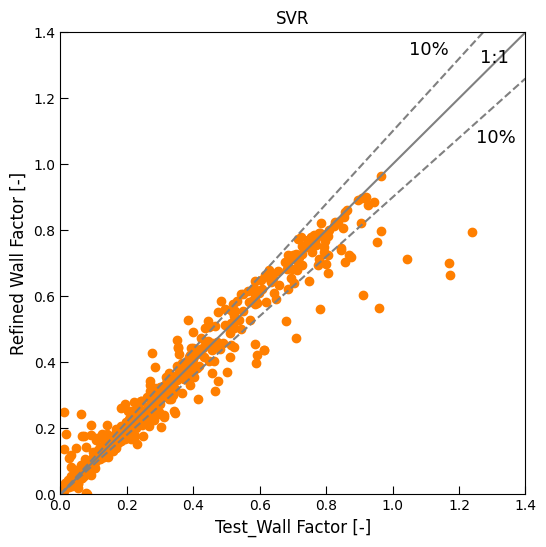

In [21]:
import matplotlib.pyplot as plt


# Set the font to Helvetica (widely available)
plt.rcParams['font.family'] = 'Helvetica'

# Stronger Orange for 20% Deviation Lines
strong_orange = '#FF7F00'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_test, y_pred, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("Test_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("SVR", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

## ML models metrics

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9286133641930803
Root Mean Squared Error (RMSE): 0.06814050289893006
Mean Squared Error: 0.004643128135319095
Mean Absolute Error (MAE): 0.03701898186164623


In [22]:
import time

# Measure training time
training_time = end_train - start_train

# Measure prediction time
prediction_time = end_pred - start_pred

print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 76.68571 seconds
Prediction Time: 0.45957 seconds
